## Part two of the project



# Import Libraries

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
df = pd.read_json('ultimate_data_challenge.json')

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


## Data Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [6]:
'Dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1])

'Dataset has 50000 rows and 12 columns'

In [7]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [8]:
df.isna().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver       True
avg_surge                 False
last_trip_date            False
phone                      True
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver       True
dtype: bool

In [9]:
missing_info = pd.concat([df.isnull().sum(), df.isnull().mean() * 100], axis=1)
missing_info.columns = ['num_missing', 'percentage']
missing_info

,num_missing,percentage
city,0,0.000
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_rating_of_driver,8122,16.244
avg_surge,0,0.000
last_trip_date,0,0.000
phone,396,0.792
surge_pct,0,0.000
ultimate_black_user,0,0.000
weekday_pct,0,0.000


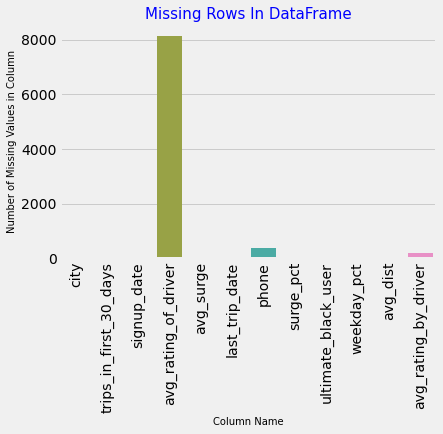

In [10]:
sns.barplot(x=missing_info.index, y='num_missing', data=missing_info)
plt.xticks(rotation=90)
plt.title('Missing Rows In DataFrame', color='blue', fontsize=15)
plt.xlabel('Column Name', fontsize=10)
plt.ylabel('Number of Missing Values in Column', fontsize=10)
plt.show()

In [11]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [12]:
%%time
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=6)
ratings = ['avg_rating_of_driver', 'avg_rating_by_driver']
df1 = pd.DataFrame(imputer.fit_transform(df[ratings]), columns=ratings)

CPU times: user 25.9 s, sys: 19.7 s, total: 45.6 s
Wall time: 28.8 s


In [13]:
df = df.drop(ratings, axis=1)
df = pd.concat([df, df1], axis=1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_of_driver,avg_rating_by_driver
0,King's Landing,4,2014-01-25,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,4.7,5.0
1,Astapor,0,2014-01-29,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,5.0
2,Astapor,3,2014-01-06,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,4.3,5.0
3,King's Landing,9,2014-01-10,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.6,4.9
4,Winterfell,14,2014-01-27,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.4,4.9


In [14]:
df.isna().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_surge                 False
last_trip_date            False
phone                      True
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_of_driver      False
avg_rating_by_driver      False
dtype: bool

In [15]:
df.fillna(value='Other', inplace=True)

In [16]:
df.isna().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_surge                 False
last_trip_date            False
phone                     False
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_of_driver      False
avg_rating_by_driver      False
dtype: bool

In [17]:
df.tail()

,city,trips_in_first_30_days,signup_date,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_of_driver,avg_rating_by_driver
49995,King's Landing,0,2014-01-25,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,5.000000,4.2
49996,Astapor,1,2014-01-24,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.366667,4.0
49997,Winterfell,0,2014-01-31,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.000000,5.0
49998,Astapor,2,2014-01-14,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.000000,3.5
49999,Astapor,0,2014-01-18,1.0,2014-04-20,Android,0.0,False,0.0,3.49,5.000000,5.0


## Exploratory Data Analysis

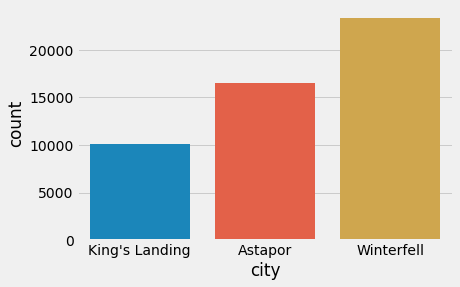

In [18]:
sns.countplot(x='city', data=df)
plt.show()

Most trips are requested in Winterfell

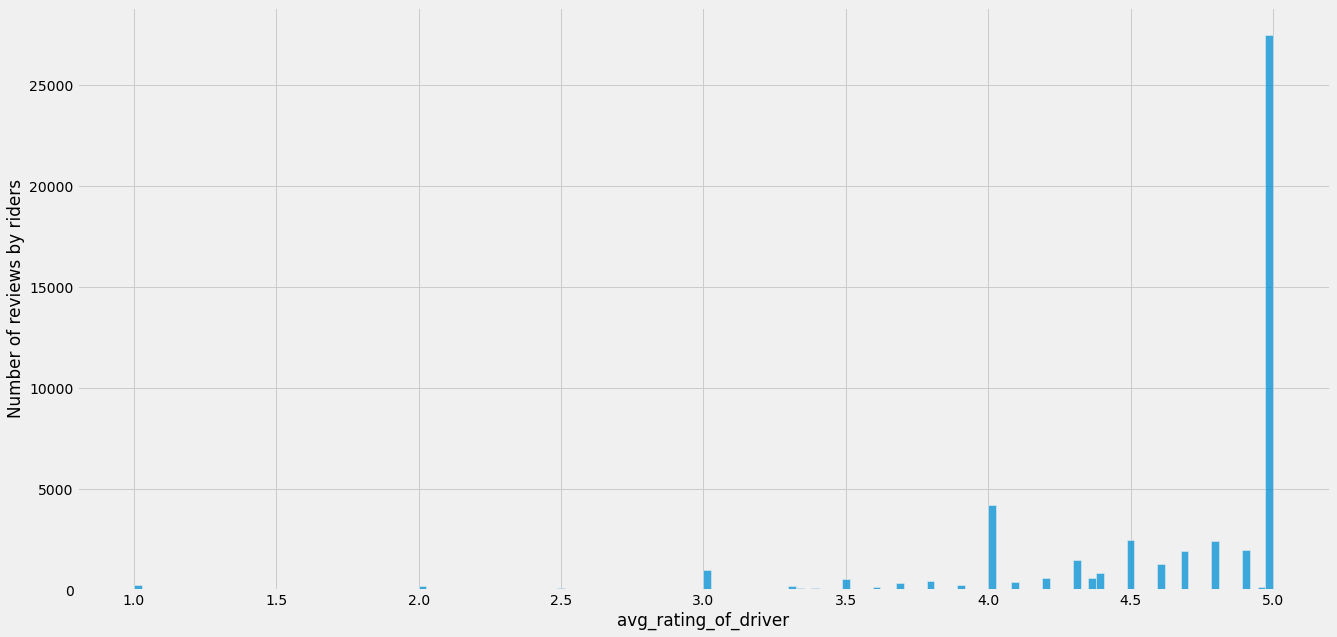

In [19]:
plt.figure(figsize=(20, 10))
sns.histplot(x='avg_rating_of_driver', data=df)
plt.ylabel('Number of reviews by riders')
plt.show()

More than half the drivers get perfect reviews after each trip.

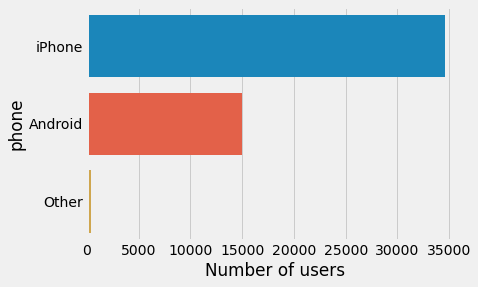

In [20]:
sns.countplot(y='phone', data=df)
plt.xlabel('Number of users')
plt.show()

For every 3 android users requesting a ride, there are 7 iphone users doing the same thing. In other words, 70% of riders used an iphone while 30% percent used an Android device. 

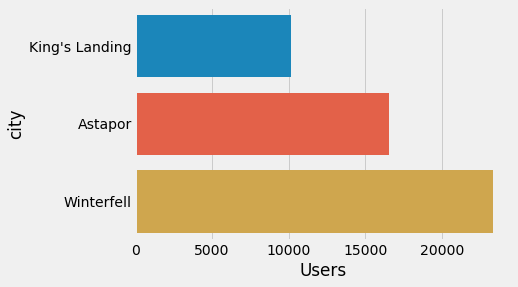

In [21]:
sns.countplot(y='city', data=df)
plt.xlabel('Users')
plt.show()

Winterfell has the most registered riders. For each King's landing rider, there is more than two registered riders in winterfell

In [22]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [23]:
df = df.sort_values(by='last_trip_date', ascending=False)

data was sorted by the last trip to determine active users. 'last_trip_date' and 'signup_date' columns were converted to date time format to determine active users in the past thirty days. 

In [24]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_of_driver,avg_rating_by_driver
4486,Winterfell,4,2014-01-25,1.00,2014-07-01,Android,0.0,True,25.0,11.94,5.0,5.0
43047,King's Landing,1,2014-01-15,1.01,2014-07-01,iPhone,0.8,True,89.3,5.49,5.0,4.7
24059,Astapor,1,2014-01-24,1.11,2014-07-01,iPhone,14.3,False,71.4,8.62,4.3,4.9
40290,King's Landing,2,2014-01-07,1.02,2014-07-01,iPhone,1.6,True,95.2,7.51,4.9,4.8
28689,King's Landing,5,2014-01-16,1.00,2014-07-01,iPhone,0.0,False,75.0,16.32,5.0,5.0


In [25]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], format='%Y-%m-%d')
df['signup_date'] = pd.to_datetime(df['signup_date'], format='%Y-%m-%d')

In [26]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_of_driver             float64
avg_rating_by_driver             float64
dtype: object

In [27]:
month = timedelta(days = 30)
month_before = datetime(2014, 7, 1) - month
month_before

datetime.datetime(2014, 6, 1, 0, 0)

In [28]:
active = df['last_trip_date'] >= '2014-06-01'

In [29]:
df[active]

,city,trips_in_first_30_days,signup_date,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_of_driver,avg_rating_by_driver
4486,Winterfell,4,2014-01-25,1.00,2014-07-01,Android,0.0,True,25.0,11.94,5.0,5.0
43047,King's Landing,1,2014-01-15,1.01,2014-07-01,iPhone,0.8,True,89.3,5.49,5.0,4.7
24059,Astapor,1,2014-01-24,1.11,2014-07-01,iPhone,14.3,False,71.4,8.62,4.3,4.9
40290,King's Landing,2,2014-01-07,1.02,2014-07-01,iPhone,1.6,True,95.2,7.51,4.9,4.8
28689,King's Landing,5,2014-01-16,1.00,2014-07-01,iPhone,0.0,False,75.0,16.32,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10182,Astapor,1,2014-01-04,1.00,2014-06-01,Android,0.0,True,0.0,5.90,5.0,5.0
29565,Astapor,1,2014-01-13,1.00,2014-06-01,iPhone,0.0,False,50.0,3.69,4.3,5.0
12220,Winterfell,0,2014-01-01,1.00,2014-06-01,iPhone,0.0,False,0.0,3.96,4.0,5.0
49573,Winterfell,2,2014-01-13,1.08,2014-06-01,iPhone,16.7,False,50.0,3.92,5.0,5.0


In [30]:
fraction_retained = len(df[active])/len(df)
'There is a ratio of {} clients retained from the service'.format(round(fraction_retained, 2))

'There is a ratio of 0.38 clients retained from the service'

In [31]:
df['active'] = df['last_trip_date'].apply(lambda x: 1 if x >= datetime(2014,6,1) else 0)

In [32]:
df.tail()

,city,trips_in_first_30_days,signup_date,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_of_driver,avg_rating_by_driver,active
23907,Winterfell,1,2014-01-01,3.00,2014-01-01,Android,100.0,False,100.0,3.36,5.0,5.0,0
47804,Astapor,1,2014-01-01,1.00,2014-01-01,Android,0.0,True,100.0,7.17,5.0,5.0,0
11578,Winterfell,1,2014-01-01,1.00,2014-01-01,Android,0.0,True,100.0,18.63,5.0,5.0,0
11573,Astapor,1,2014-01-01,1.25,2014-01-01,iPhone,100.0,False,100.0,2.47,5.0,5.0,0
15359,Winterfell,1,2014-01-01,1.00,2014-01-01,iPhone,0.0,False,100.0,6.16,4.0,5.0,0


In [33]:
df['active'].value_counts()

0    31196
1    18804
Name: active, dtype: int64

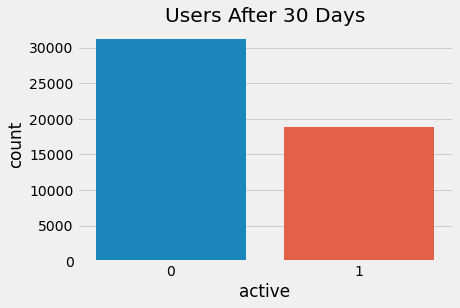

In [34]:
sns.countplot(x='active', data=df)
plt.title('Users After 30 Days')
plt.show()

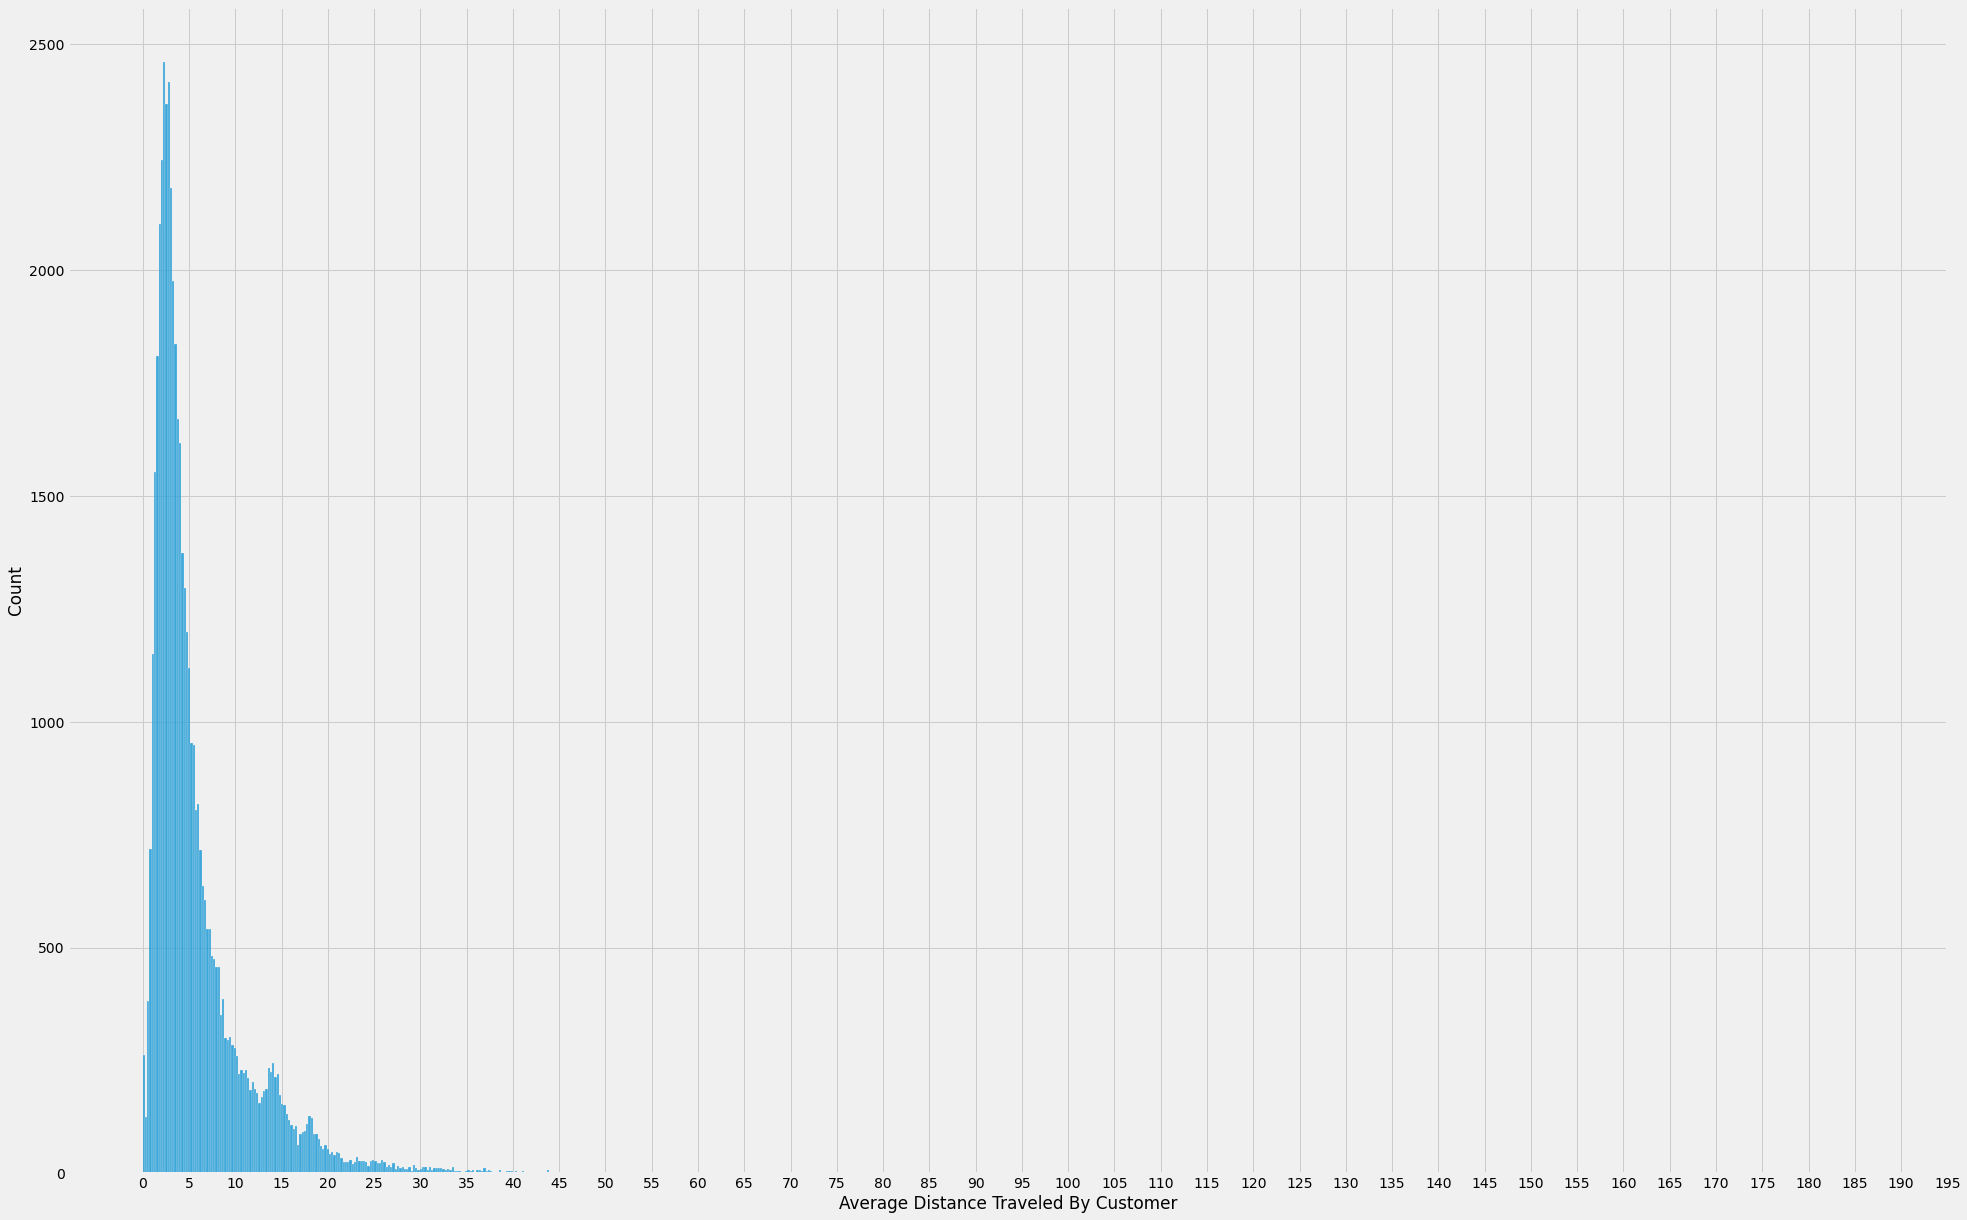

In [35]:
plt.figure(figsize=(30, 20))
sns.histplot(x='avg_dist', data=df)
plt.xlabel('Average Distance Traveled By Customer')
plt.xticks(np.arange(0,200, step=5))
plt.show()

A large portion of riders take an less than an average of 10 miles per trip in the last thirty days.  

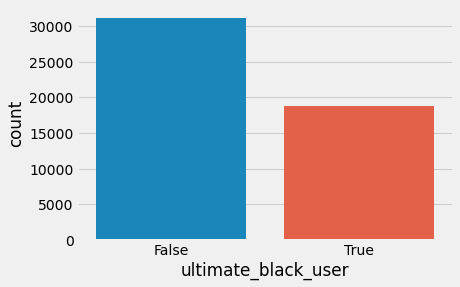

In [36]:
sns.countplot(x='ultimate_black_user', data=df)
plt.show()

In the past thirty days, almost two out of every five riders are signed up as an ultimate black user. This equates to about 37% percent of total riders in the past month. 

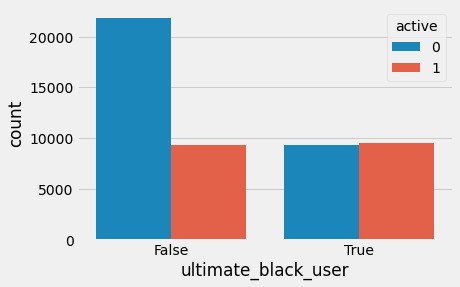

In [37]:
sns.countplot(x='ultimate_black_user', hue='active', data=df)
plt.show()

Active users appear to be the same for ultimate black users and non ultimate black users. It also seems like ultimate black users are more likely to be active than non-ultimate black users

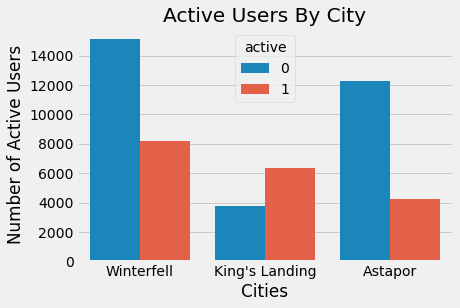

In [38]:
sns.countplot(x='city', hue='active', data=df)
plt.title('Active Users By City')
plt.xlabel('Cities')
plt.ylabel('Number of Active Users')
plt.show()

Winterfell has the most active and non-active users. Interestingly, King's Landing has the least number of riders but the second highest number of active riders.

In [39]:
from sklearn.utils import resample

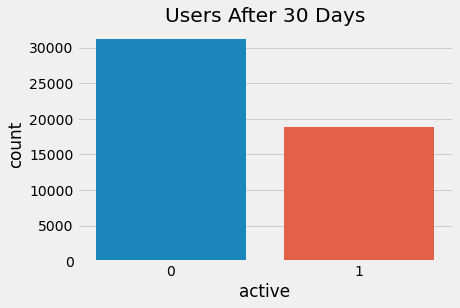

In [40]:
sns.countplot(x='active', data=df)
plt.title('Users After 30 Days')
plt.show()

In [41]:
df_major = df[df['active'] == 1]
df_minor = df[df['active'] == 0]

In [42]:
df_major['active'].count()

18804

In [43]:
df_minor_resample = resample(df_minor, replace=True, n_samples=18804, random_state=567)

In [44]:
under_sampled_df = pd.concat([df_minor_resample, df_major])

In [45]:
under_sampled_df['active'].value_counts()

1    18804
0    18804
Name: active, dtype: int64

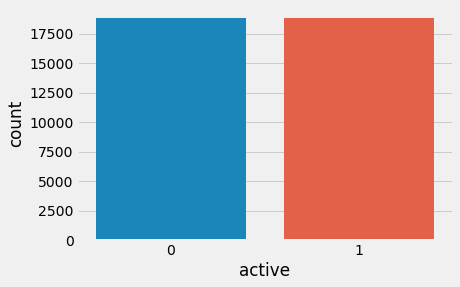

In [46]:
sns.countplot(under_sampled_df['active'])
plt.show()

In [47]:
under_sampled_df.head()

,city,trips_in_first_30_days,signup_date,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_of_driver,avg_rating_by_driver,active
43692,Winterfell,1,2014-01-16,1.00,2014-04-07,Android,0.0,False,100.0,1.21,4.366667,4.0,0
26437,King's Landing,2,2014-01-03,1.75,2014-01-25,Android,50.0,True,0.0,6.14,4.500000,5.0,0
38892,Astapor,1,2014-01-02,1.00,2014-01-04,Android,0.0,False,100.0,11.72,3.000000,5.0,0
16126,Winterfell,1,2014-01-11,1.00,2014-02-07,Android,0.0,False,100.0,3.22,5.000000,5.0,0
3380,Astapor,0,2014-01-09,1.00,2014-04-17,iPhone,0.0,True,100.0,1.35,5.000000,3.0,0


# Modeling and Preprocessing

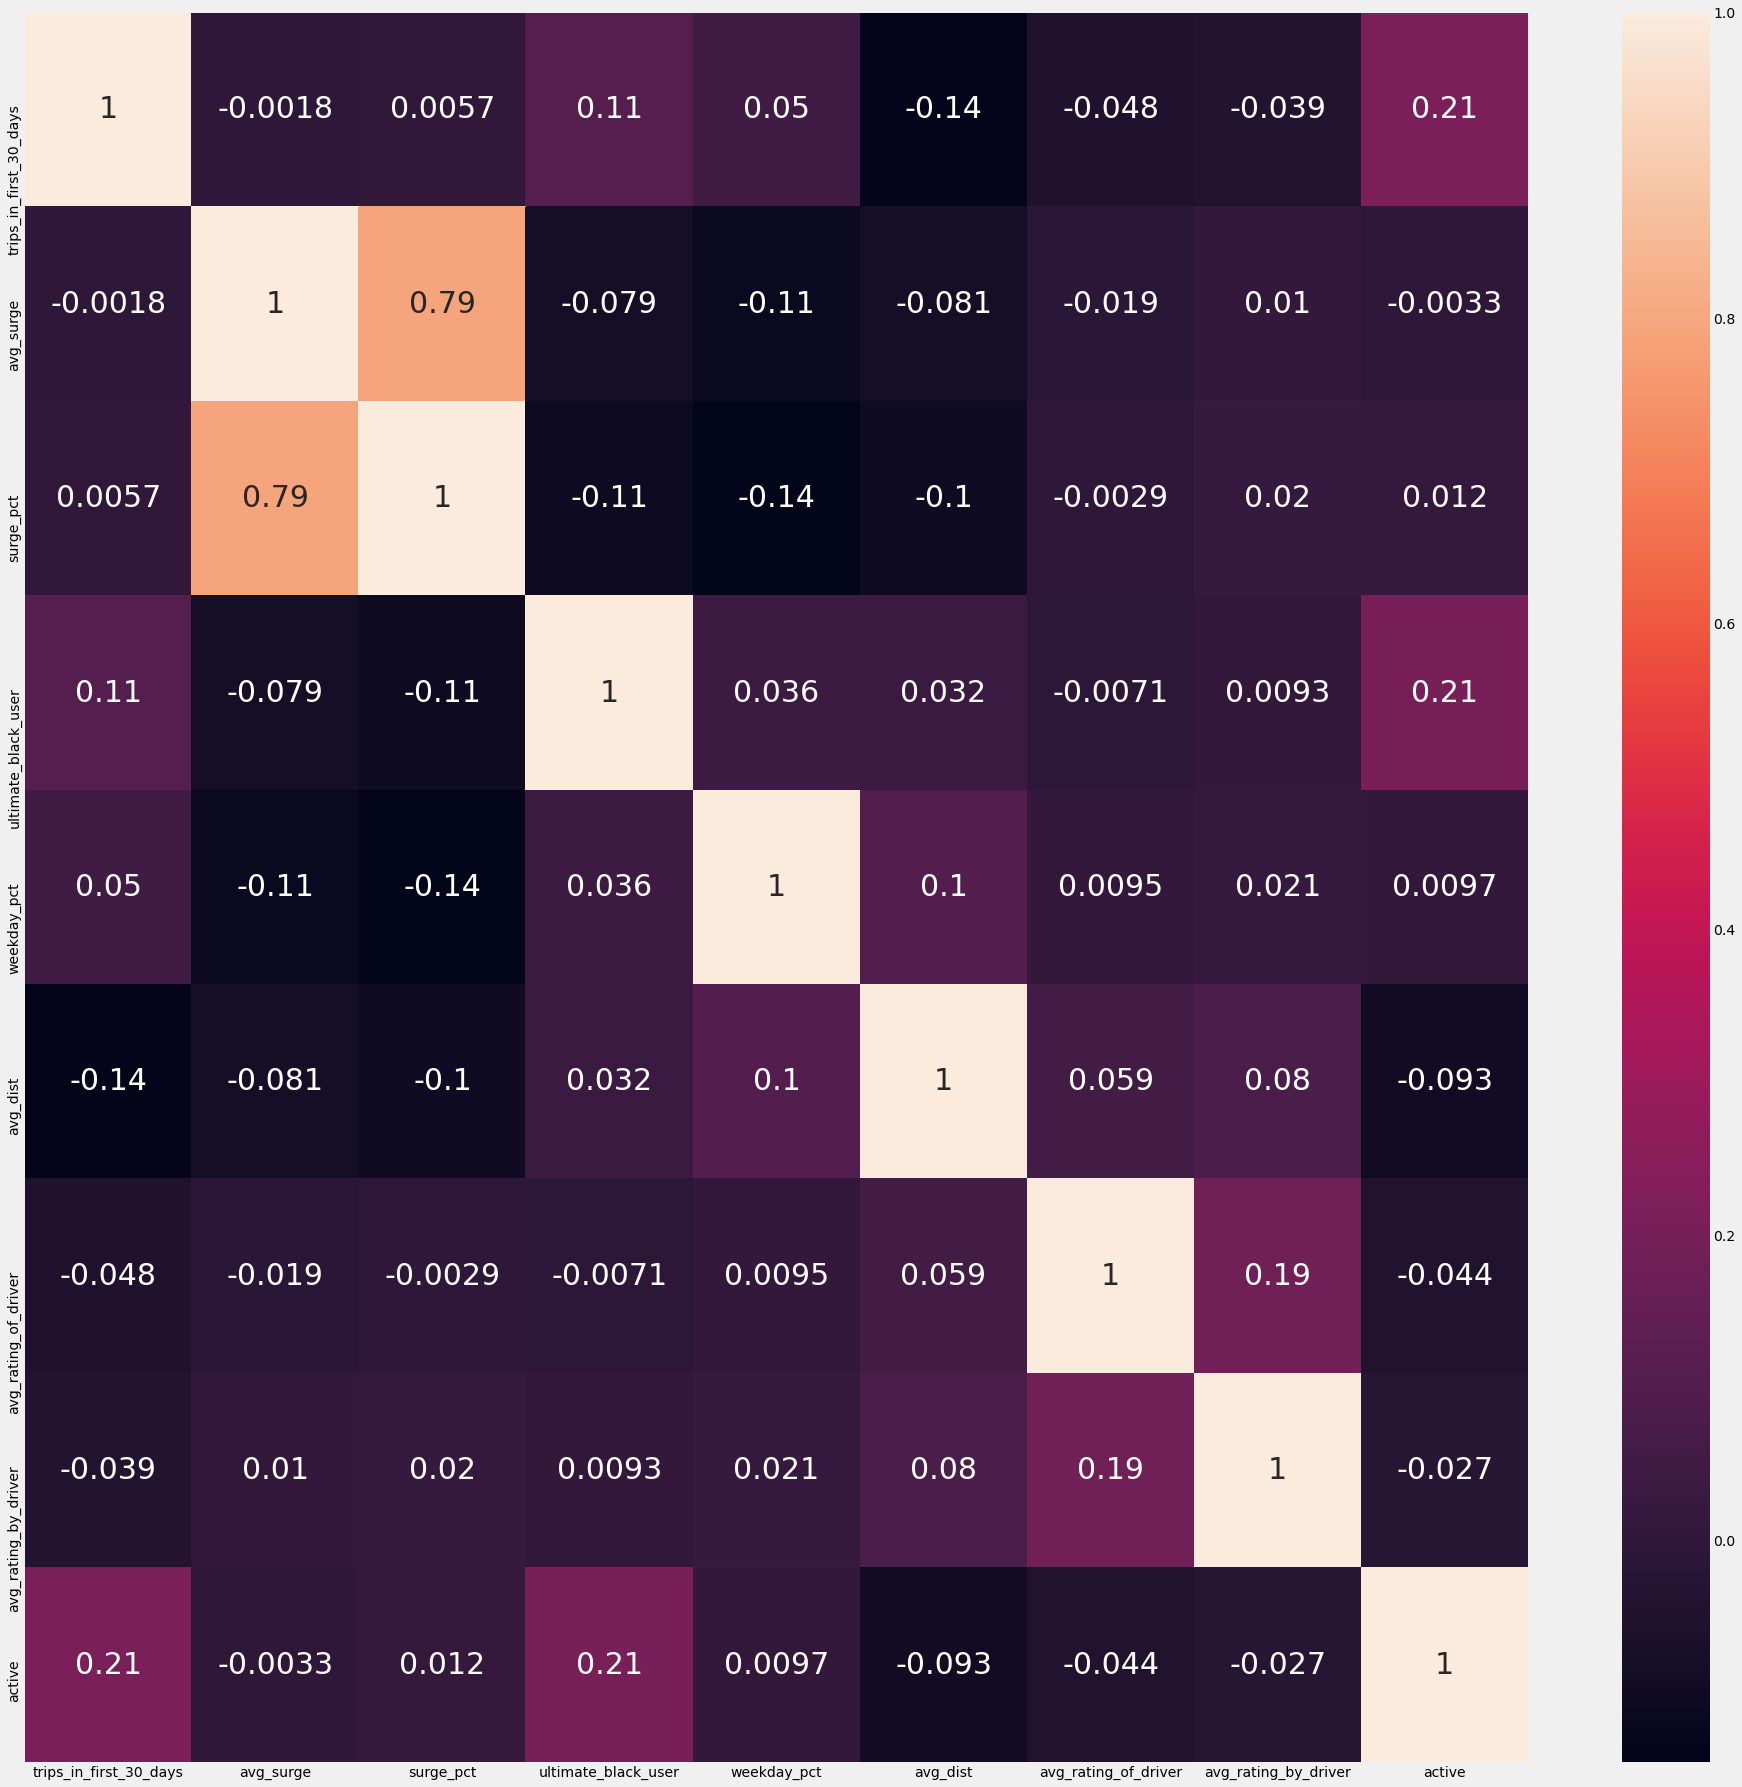

In [48]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, annot_kws=({'size':30}))
plt.show()

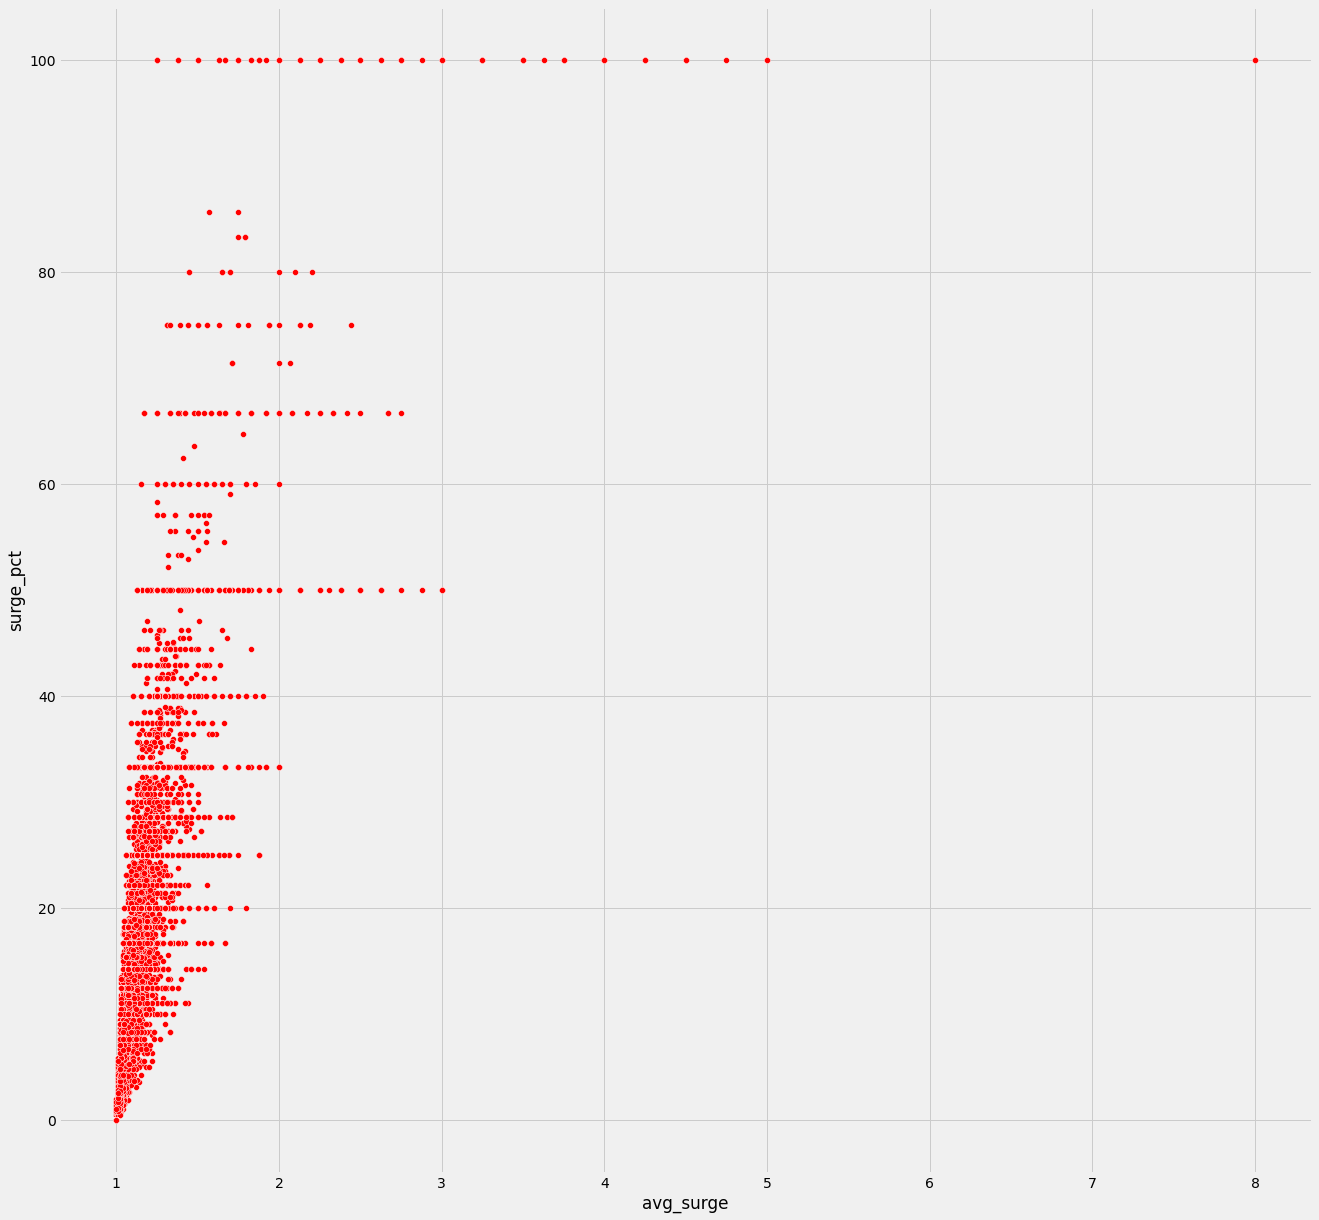

In [49]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x='avg_surge', y='surge_pct', data=under_sampled_df, color='red')
plt.show()

avg_surge and surge_pct appear to be highly correlated with one another. Both features seem to be interpreting the same aspect of rider experience. To avoid the problems of colinearity, surge_pct was be dropped to before modeling 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
df = pd.get_dummies(df)

In [52]:
df.drop(columns=['signup_date', 'last_trip_date', 'surge_pct'], axis=1, inplace=True)

In [53]:
df.head()

,trips_in_first_30_days,avg_surge,ultimate_black_user,weekday_pct,avg_dist,avg_rating_of_driver,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone
4486,4,1.00,True,25.0,11.94,5.0,5.0,1,0,0,1,1,0,0
43047,1,1.01,True,89.3,5.49,5.0,4.7,1,0,1,0,0,0,1
24059,1,1.11,False,71.4,8.62,4.3,4.9,1,1,0,0,0,0,1
40290,2,1.02,True,95.2,7.51,4.9,4.8,1,0,1,0,0,0,1
28689,5,1.00,False,75.0,16.32,5.0,5.0,1,0,1,0,0,0,1


In [54]:
features = [i for i in df.columns if i != 'active']
features

['trips_in_first_30_days',
 'avg_surge',
 'ultimate_black_user',
 'weekday_pct',
 'avg_dist',
 'avg_rating_of_driver',
 'avg_rating_by_driver',
 'city_Astapor',
 "city_King's Landing",
 'city_Winterfell',
 'phone_Android',
 'phone_Other',
 'phone_iPhone']

In [55]:
X = df[features]
y = df['active']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=999, stratify=y)

In [57]:
X_test.shape, X_train.shape

((12500, 13), (37500, 13))

## 1. Logistic Regression

In [58]:
lr_pipeline = Pipeline([('standardscaler', StandardScaler()),
                        ('lr_classifer', LogisticRegression(random_state=999))])

In [59]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lr_classifer', LogisticRegression(random_state=999))])

In [60]:
lr_pipeline.score(X_test, y_test)

0.71944

## Hyperparameter Tuning

In [61]:
%%time
from sklearn.model_selection import GridSearchCV
g = GridSearchCV(LogisticRegression(), cv=10, param_grid={'C': np.arange(0, 1, step=.1)}, verbose=1, refit=True, scoring='accuracy')
g.fit(X_train.values, y_train.values)
print('Tuned Logistic Regression Parameters: {}'.format(g.best_params_))
print('Best score is {}'.format(g.best_score_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.3s finished


Tuned Logistic Regression Parameters: {'C': 0.7000000000000001}
Best score is 0.7175466666666667
CPU times: user 1min 43s, sys: 24.5 s, total: 2min 7s
Wall time: 17.6 s


## Model Evaluation

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
y_pred = g.predict(X_test)

In [64]:
logreg_matrix = confusion_matrix(y_test, y_pred)

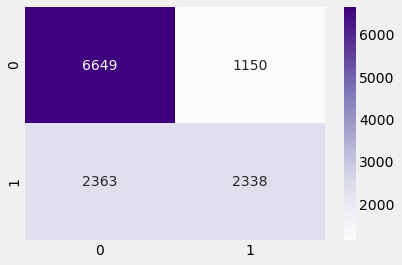

In [65]:
sns.heatmap(logreg_matrix, annot=True, fmt='g', cmap='Purples')
plt.show()

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      7799
           1       0.67      0.50      0.57      4701

    accuracy                           0.72     12500
   macro avg       0.70      0.67      0.68     12500
weighted avg       0.71      0.72      0.71     12500



## Feature Importance

In [69]:
importance = g.best_estimator_.coef_[0]
importance_df = pd.DataFrame({'features': features, 'coefficients': importance})
importance_df = importance_df.sort_values(by=['coefficients'], ascending=False)
importance_df

,features,coefficients
8,city_King's Landing,0.991967
2,ultimate_black_user,0.854853
12,phone_iPhone,0.555336
0,trips_in_first_30_days,0.118431
1,avg_surge,0.055648
3,weekday_pct,-0.000238
11,phone_Other,-0.000565
4,avg_dist,-0.035465
5,avg_rating_of_driver,-0.112318
6,avg_rating_by_driver,-0.125575


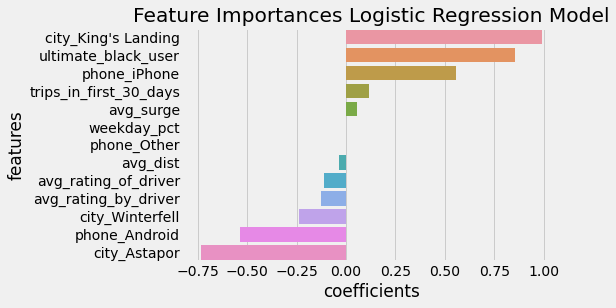

In [133]:
sns.barplot(x='coefficients', y='features', data=importance_df)
plt.title('Feature Importances Logistic Regression Model')
plt.show()

King's Ladning is the most important feature in the logistic regression model. This is no surprise considering King's Landing has the most registered users. 

## Random Forest Model

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf_pipeline = Pipeline([('rf_classifier', RandomForestClassifier(random_state=42))])
rf_pipeline.fit(X_train, y_train)
rf_pipeline.score(X_test, y_test)

0.75248

In [117]:
param_grid = {"n_estimators": np.arange(100, 500, step=100),
              "max_depth": np.arange(1,10, step=1),
              "criterion":['gini', 'entropy']
             }

## Hyperparameter Tuning

In [118]:
rf_g = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, 
                    verbose=1,
                    refit=True,
                    n_jobs=-1,
                    scoring='accuracy'
                   )

In [119]:
rf_g.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 200, 300, 400])},
             scoring='accuracy', verbose=1)

In [120]:
print('Tuned Random Forest Parameters: {}'.format(rf_g.best_params_))
print('Best score is {}'.format(rf_g.best_score_))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 200}
Best score is 0.7803466666666667


## Random Forest Model Evaluation

In [121]:
y_pred = rf_g.predict(X_test)
y_pred
rf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      7849
           1       0.74      0.66      0.70      4651

    accuracy                           0.79     12500
   macro avg       0.77      0.76      0.76     12500
weighted avg       0.78      0.79      0.78     12500



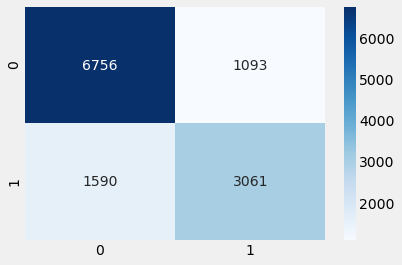

In [122]:
sns.heatmap(rf_matrix, annot=True, fmt='g', cmap='Blues')
plt.show()

In [128]:
rf_imp = rf_g.best_estimator_.feature_importances_
rf_imp_df = pd.DataFrame({'features': features, 'coefficients': rf_imp})
rf_imp_df = rf_imp_df.sort_values(by=['coefficients'], ascending=False)
rf_imp_df

,features,coefficients
6,avg_rating_by_driver,0.192681
1,avg_surge,0.149075
3,weekday_pct,0.138998
8,city_King's Landing,0.126259
0,trips_in_first_30_days,0.071671
2,ultimate_black_user,0.069764
12,phone_iPhone,0.052416
10,phone_Android,0.051603
5,avg_rating_of_driver,0.048471
4,avg_dist,0.043494


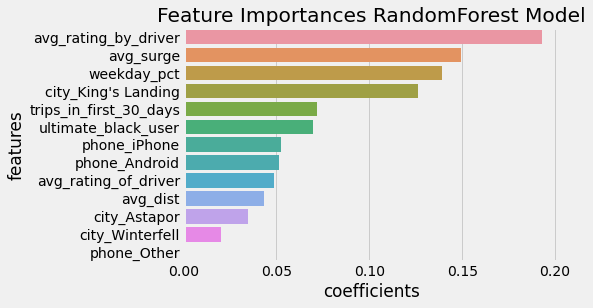

In [132]:
sns.barplot(y='features', x='coefficients', data=rf_imp_df)
plt.title('Feature Importances RandomForest Model')
plt.show()

Random Forest Model appears to perform a bit better at predicting active users. The Most important feature in the model was average rating by driver. This indicates that how drivers view their potential riders could be an important aspect in keeping current users. average surge prices was another important aspect in keeping users active. Could lower surge prices could lead to more active users? More statistical tests would be needed to test this and many other scenarios